In [2]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

<h1>AutoRegressive Process - AR(p)</h1>
$$y_{t} = c  + \phi_{1} y_{t-1} + \phi_{2} y_{t-2} + \cdots + \phi_{p} y_{t-p} + \epsilon$$ 
<p> sendo $p$ a ordem, $\epsilon$ o ruído branco e $c$ uma constante. <p>

In [3]:
#a série tem que ser estacionária.
#AR(2)

#gerando 10000 pontos
ar2 = np.array([1,0.33, 0.5]) #yt = 1  + 0.33yt-1 + 0.5t-2
ma = np.array([1])

In [4]:
simulated_AR2_data = ArmaProcess(ar2, ma).generate_sample(nsample=10000)

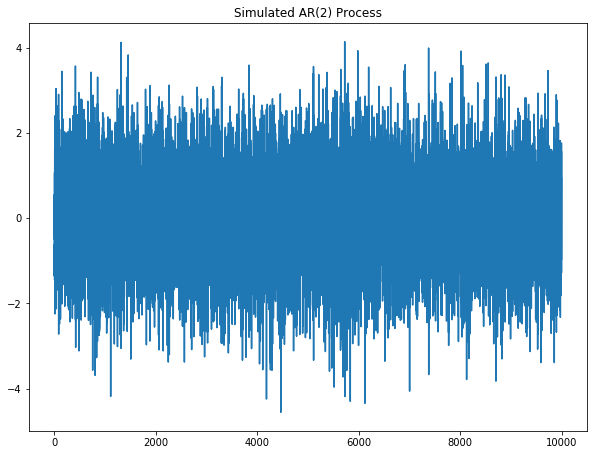

In [5]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_AR2_data)
plt.title("Simulated AR(2) Process")
plt.show()

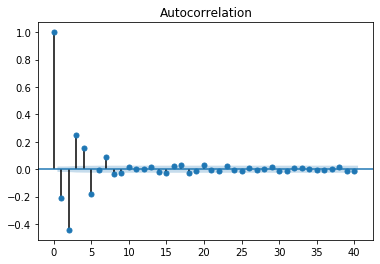

In [6]:
plot_acf(simulated_AR2_data); #como a autocorrelacao vai caindo, pode-se usar o processo de média móvel

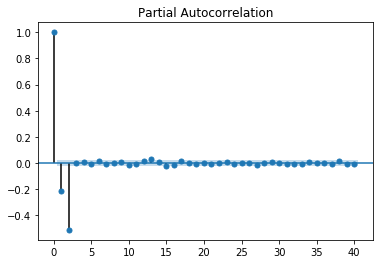

In [7]:
plot_pacf(simulated_AR2_data); #acima de 2 não é significativo
#pacf_coef_AR2 = pacf(simulated_AR2_data) se quiser plotar os resultados

In [8]:
#usando a equação de Yule-Walker para achar os coef do AR(2):


In [9]:
rho, c = yule_walker(simulated_AR2_data, 2, method='mle')
print(f'rho: {-rho}')
print(f'c: {c}') #os coeficientes são próximos 

rho: [0.32066514 0.51123272]
c: 0.9900733025389097


In [11]:
rho, c = yule_walker(simulated_AR2_data, 2, method='unbiased')
print(f'rho: {-rho}')
print(f'c: {c}') #os coeficientes são próximos 

rho: [0.32071993 0.51133981]
c: 0.9899952407364294


In [ ]:
#simulando AR3
ar3 = np.array([1, 0.33, 0.5, 0.07]) #yt = 1 + 0.33 yt-1 + 0.5yt-2 + 0.07yt-3 
ma = np.array([1])
simulated_AR3_data = ArmaProcess(ar3,ma).generate_sample(nsample=10000)

In [ ]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_AR3_data)
plt.title("Simulated AR(3) Process")
plt.show()

In [ ]:
plot_pacf(simulated_AR3_data);
plot_acf(simulated_AR3_data);

In [ ]:
rho, sigma = yule_walker(simulated_AR3_data, 3, method='mle')
print(f'rho: {-rho}')
print(f'c: {c}')

In [ ]:
#no dataset dos retornos da ação da johnson and johnson
import pandas as pd
data = pd.read_csv("C:\\Users\\vinic\\Desktop\\R\\timeseries_models\\datasets\\jj.csv")

In [ ]:
data

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.scatter(data['date'], data['data'])
plt.title('Quaterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
#o dataset não é estacionário. tirando o log diff para ser

In [ ]:
data['data'] = np.log(data['data'])

In [ ]:
data['data'] = data['data'].diff()
data

In [ ]:
data = data.drop(data.index[0]) #tirando o primeiro
data

In [ ]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['data'])
plt.title("Log Difference of Quaterly EPS for Johnson & Johnson")
plt.show()

In [ ]:
#Teste Fuller aumentado e tendo a confiaça que a série é estacionário
ad_fuller_result = adfuller(data['data'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

In [ ]:
plot_pacf(data['data']); #até o 4 é significativo
plot_acf(data['data']);

In [ ]:
# Try a AR(4) model
rho, c = yule_walker(data['data'], 4)
print(f'rho: {-rho}')
print(f'c: {c}')

<p> A equação final fica: </p>
$$y_{t} \approx 0.01 + 0.64 y_{t-1} + 0.54 y_{t-2} + 0.51 y_{t-3} - 0.28y_{t-4}$$